1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [5]:
dataframe.clase.value_counts()

0    86
2    44
1    40
Name: clase, dtype: int64

In [6]:
# Eliminar las filas cuya clase =1
dataframe.drop(dataframe[dataframe.clase==1].index, axis = 0, inplace=True)

In [7]:
dataframe.clase.value_counts()


0    86
2    44
Name: clase, dtype: int64

In [8]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,97.180708,2.069231,9.053846,30.769231,0.676923
std,198.611241,1.629136,10.098976,47.961150,0.950034
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,6.000000,0.000000
50%,12.000000,1.000000,6.000000,15.000000,0.000000
75%,65.250000,2.000000,12.000000,35.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


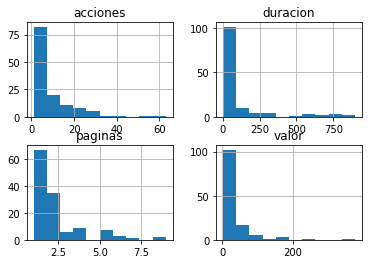

In [9]:
dataframe.drop(['clase'], 1).hist()
plt.show()

In [10]:
X = np.array(dataframe.drop(['clase'], 1))
y = np.array(dataframe['clase'])
X.shape

(130, 4)

In [11]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [12]:
predictions = model.predict(X)
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]


In [13]:
model.score(X,y)

0.9538461538461539

`Se mejora la precisión del modelo (95% vs 77%) pues la variable target tiene menos posibles valores (2 en vez de 3)`

# Adicional: Validación del Modelo

In [14]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [15]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[0.81818182 0.81818182 1.         0.81818182 1.         0.9
 1.         1.         1.         0.9       ]
Logistic Regression: 0.925455 (0.079752)


In [16]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.9615384615384616


In [17]:
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 96.15 %
Error: 3.85 %


## Reporte de Resultados

In [18]:
print(confusion_matrix(Y_test, predictions))

[[22  1]
 [ 0  3]]


# Clasificación de nuevos registros

In [19]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([2])